<a href="https://colab.research.google.com/github/grupo21dex/deliverable-2/blob/main/deliverable2_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas utilizadas:

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 

In [ ]:
df = pd.read_csv('Walmart.csv')

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Definição das colunas

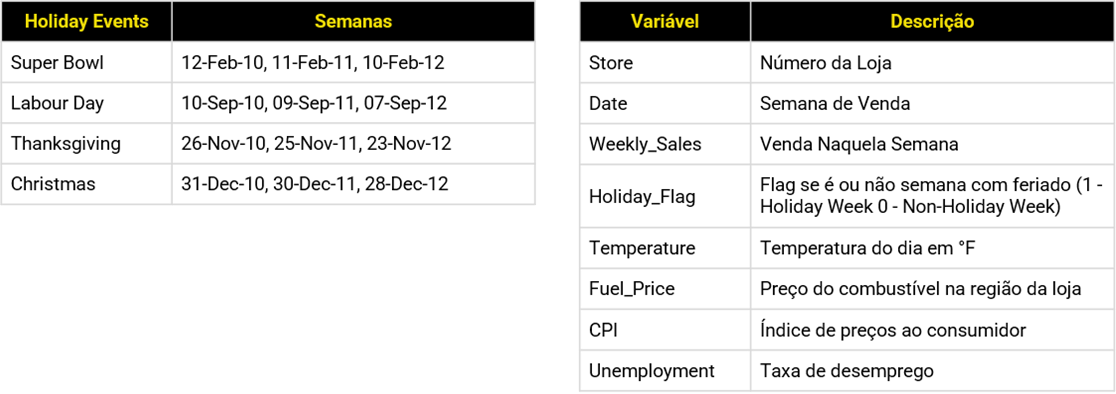

Criando a coluna ***Holiday_type*** que mostra se é dia normal ou feriado

In [ ]:
print(df['Date'].dtypes)

object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


mudando o tipo da coluna ***Date*** para formato de data

Verificando se só tem valores 0 e 1 na coluna ***Holiday_Flag***

In [ ]:
pd.DataFrame(df['Holiday_Flag'].value_counts())

,Holiday_Flag
0,5985
1,450


In [ ]:
len(df)

6435

Criando a lista ***Holiday_Type*** que coloca o nome do feriado em sua data (***Super_boul, Labour_day, Thanksgiving, Christmans***)

In [ ]:
Holiday_Type = list()	
for x,y in enumerate(df['Holiday_Flag']):
  if y == 0:
    Holiday_Type.append('Regular_day')
  elif y == 1:
    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':
      Holiday_Type.append('Super_Boul')
    if df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':
      Holiday_Type.append('Labour_Day')
    if df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':
      Holiday_Type.append('Thanksgiving')
    if df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':
      Holiday_Type.append('Christmans')


Adicionando a coluna ***Holiday_type*** que diz se é um dia normal ou qual feriado

Criando a coluna ***Holiday_Type*** 

In [ ]:
len(Holiday_Type)

6435

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Holiday_type'] = Holiday_Type

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Regular_day
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Boul
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Regular_day
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Regular_day
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Regular_day
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Regular_day
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,Regular_day
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,Regular_day
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Regular_day


criando colunas especificas de cada feriado para ficar mais facil buscar os dados do feriado

Arrumar o codigo para ficar menor e mais eficiente

FIzemos um retrabalho aqui!!!!!!

In [ ]:
'''Super_boul = list()
Labour_day = list()
Thanksgiving = list()
Christmans = list()

Holiday_Type = list()	
for x,y in enumerate(df['Holiday_Flag']):
    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':
      Super_boul.append(1)
    else:
      Super_boul.append(0)
    if df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':
      Labour_day.append(1)
    else:
      Labour_day.append(0)
    if df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':
      Thanksgiving.append(1)
    else:
      Thanksgiving.append(0)
    if df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':
      Christmans.append(1)
    else:
      Christmans.append(0)'''

"Super_boul = list()\nLabour_day = list()\nThanksgiving = list()\nChristmans = list()\n\nHoliday_Type = list()\t\nfor x,y in enumerate(df['Holiday_Flag']):\n    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':\n      Super_boul.append(1)\n    else:\n      Super_boul.append(0)\n    if df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':\n      Labour_day.append(1)\n    else:\n      Labour_day.append(0)\n    if df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':\n      Thanksgiving.append(1)\n    else:\n      Thanksgiving.append(0)\n    if df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':\n      Christmans.append(1)\n    else:\n      Christmans.append(0)"

In [ ]:
'''Super_boul = list()
Labour_day = list()
Thanksgiving = list()
Christmans = list()

Holiday_Type = list()	
for x,y in enumerate(df['Holiday_Flag']):
    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':
      Super_boul.append(1)
    elif df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':
      Labour_day.append(1)
    elif df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':
      Thanksgiving.append(1)
    elif df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':
      Christmans.append(1)
    else:
      Super_boul.append(0)
      Labour_day.append(0)
      Thanksgiving.append(0)
      Christmans.append(0)'''

"Super_boul = list()\nLabour_day = list()\nThanksgiving = list()\nChristmans = list()\n\nHoliday_Type = list()\t\nfor x,y in enumerate(df['Holiday_Flag']):\n    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':\n      Super_boul.append(1)\n    elif df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':\n      Labour_day.append(1)\n    elif df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':\n      Thanksgiving.append(1)\n    elif df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':\n      Christmans.append(1)\n    else:\n      Super_boul.append(0)\n      Labour_day.append(0)\n      Thanksgiving.append(0)\n      Christmans.append(0)"

In [ ]:
'''len(Super_boul),len(Labour_day),len(Thanksgiving),len(Christmans)'''

'len(Super_boul),len(Labour_day),len(Thanksgiving),len(Christmans)'

In [ ]:
'''df['Super_boul'] = Super_boul
df['Labour_day'] = Labour_day
df['Thanksgiving'] = Thanksgiving
df['Christmans'] = Christmans'''

"df['Super_boul'] = Super_boul\ndf['Labour_day'] = Labour_day\ndf['Thanksgiving'] = Thanksgiving\ndf['Christmans'] = Christmans"

In [ ]:
#df['Super_boul'].value_counts(),df['Labour_day'].value_counts(),df['Thanksgiving'].value_counts(),df['Christmans'].value_counts()

In [ ]:
df[df['Holiday_type']=='Super_Boul']

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Boul
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,Super_Boul
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,Super_Boul
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,Super_Boul
196,2,2011-11-02,2168041.61,1,33.19,3.022,212.592862,8.028,Super_Boul
...,...,...,...,...,...,...,...,...,...
6202,44,2011-11-02,307486.73,1,30.83,3.034,127.859129,7.224,Super_Boul
6254,44,2012-10-02,325377.97,1,33.73,3.116,130.384903,5.774,Super_Boul
6293,45,2010-12-02,656988.64,1,27.73,2.773,181.982317,8.992,Super_Boul
6345,45,2011-11-02,766456.00,1,30.30,3.239,183.701613,8.549,Super_Boul


Fazendo a correlação

Nenhuma correlação relevante

In [ ]:
'''sns.pairplot(df)
df.corr()'''

'sns.pairplot(df)\ndf.corr()'

In [ ]:
df.corr()['Weekly_Sales']

Store          -0.335332
Weekly_Sales    1.000000
Holiday_Flag    0.036891
Temperature    -0.063810
Fuel_Price      0.009464
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64

Colocando em ordem decrescente usando a coluna ***Weekly_Sales*** para ver as semanas que tiveram mais vendas

In [ ]:
#df_Thanksgiving.sort_values(by=['Weekly_Sales'],ascending=False)

In [ ]:
df.sort_values(by=['Weekly_Sales'],ascending=False).head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724,Regular_day
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484,Regular_day
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003,Regular_day
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143,Regular_day
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795,Regular_day


---

colocar a soma da venda de cada feriado e a soma do dia normal, criar um gráfico de barras mostrando cada um

In [ ]:
df['Holiday_type'].drop_duplicates()

0      Regular_day
1       Super_Boul
31      Labour_Day
42    Thanksgiving
47      Christmans
Name: Holiday_type, dtype: object

verificando a qtdd de dias de cada tipo de dia

In [ ]:
df['Holiday_type'].value_counts()

Regular_day     5985
Super_Boul       135
Labour_Day       135
Thanksgiving      90
Christmans        90
Name: Holiday_type, dtype: int64

Somando todas as vendas e separando pelo tipo da semana

In [ ]:
df_regular = df[df['Holiday_type'] == 'Regular_day'].groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'})
df_regular

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
1,1.546957e+06,69.087669,3.229729,216.031272,7.601722
2,1.914209e+06,69.025263,3.229729,215.680620,7.617120
3,4.000648e+05,72.076617,3.229729,219.426602,7.171338
4,2.083556e+06,63.211353,3.226481,128.694529,5.951714
5,3.148923e+05,70.152857,3.229729,216.600078,6.288241
6,1.555993e+06,70.441654,3.229729,217.587894,6.600421
7,5.629645e+05,40.588346,3.253947,193.670820,8.577902
8,9.037434e+05,63.454812,3.229729,219.474107,6.086429
9,5.405993e+05,68.657895,3.229729,219.661808,6.093489


Criando data frames para cada feriado com as informações desse feriado 

In [ ]:
df[df['Holiday_type'] == 'Super_Boul'].head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Boul
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,Super_Boul
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,Super_Boul
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,Super_Boul
196,2,2011-11-02,2168041.61,1,33.19,3.022,212.592862,8.028,Super_Boul
248,2,2012-10-02,2103322.68,1,46.98,3.409,219.904907,7.057,Super_Boul
287,3,2010-12-02,420728.96,1,47.93,2.548,214.574792,7.368,Super_Boul
339,3,2011-11-02,430526.21,1,43.57,3.022,216.266091,7.551,Super_Boul
391,3,2012-10-02,473292.47,1,51.65,3.409,223.753643,6.833,Super_Boul
430,4,2010-12-02,2188307.39,1,28.84,2.573,126.496258,8.623,Super_Boul


In [ ]:
df[df['Holiday_type'] == 'Labour_Day'].head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,Labour_Day
83,1,2011-09-09,1540471.24,1,76.00,3.546,215.861056,7.962,Labour_Day
135,1,2012-07-09,1661767.33,1,83.96,3.730,222.439015,6.908,Labour_Day
174,2,2010-10-09,1839128.83,1,79.09,2.565,211.153210,8.099,Labour_Day
226,2,2011-09-09,1748000.65,1,77.97,3.546,215.514829,7.852,Labour_Day
278,2,2012-07-09,1898777.07,1,87.65,3.730,222.074763,6.565,Labour_Day
317,3,2010-10-09,352260.97,1,80.84,2.565,214.806543,7.346,Labour_Day
369,3,2011-09-09,377347.49,1,81.72,3.546,219.213530,7.567,Labour_Day
421,3,2012-07-09,408229.73,1,84.99,3.730,225.966026,6.334,Labour_Day
460,4,2010-10-09,1865820.81,1,73.54,2.574,126.114581,7.372,Labour_Day


In [ ]:
df[df['Holiday_type'] == 'Thanksgiving'].head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,Thanksgiving
94,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866,Thanksgiving
185,2,2010-11-26,2658725.29,1,62.98,2.735,211.406287,8.163,Thanksgiving
237,2,2011-11-25,2614202.30,1,56.36,3.236,218.113027,7.441,Thanksgiving
328,3,2010-11-26,565567.84,1,68.71,2.735,215.061403,7.564,Thanksgiving
380,3,2011-11-25,556925.19,1,68.00,3.236,221.901118,7.197,Thanksgiving
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127,Thanksgiving
523,4,2011-11-25,3004702.33,1,47.96,3.225,129.836400,5.143,Thanksgiving
614,5,2010-11-26,488362.61,1,66.15,2.735,212.303441,6.768,Thanksgiving
666,5,2011-11-25,507900.07,1,61.93,3.236,219.042820,6.300,Thanksgiving


In [ ]:
df[df['Holiday_type'] == 'Christmans'].head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,Christmans
99,1,2011-12-30,1497462.72,1,44.55,3.129,219.535990,7.866,Christmans
190,2,2010-12-31,1750434.55,1,47.30,2.943,211.064774,8.163,Christmans
242,2,2011-12-30,1874226.52,1,44.57,3.129,219.177306,7.441,Christmans
333,3,2010-12-31,382677.76,1,53.20,2.943,214.698647,7.564,Christmans
385,3,2011-12-30,410553.88,1,48.29,3.129,223.009084,7.197,Christmans
476,4,2010-12-31,1794868.74,1,38.09,2.955,127.087677,7.127,Christmans
528,4,2011-12-30,2007105.86,1,36.89,3.119,130.071032,5.143,Christmans
619,5,2010-12-31,298180.18,1,49.79,2.943,211.956714,6.768,Christmans
671,5,2011-12-30,349624.88,1,45.62,3.129,220.117823,6.300,Christmans


#Alguns feriados ocorreram mais vezes, ***Labour day*** e ***super boul*** tiveram 3 ocorrencias por loja, ***thanksgiving*** e ***christmans*** tiveram apenas 2

Dataframe de cada feriado por loja pegando as medias das outras colunas

In [ ]:
df_super = df[df['Holiday_type'] == 'Super_Boul'].groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'})

In [ ]:
df_labour = df[df['Holiday_type'] == 'Labour_Day'].groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'})

In [ ]:
df_thanks = df[df['Holiday_type'] == 'Thanksgiving'].groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'})

In [ ]:
df_christ = df[df['Holiday_type'] == 'Christmans'].groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'})
df_christ

grafico de barras comparando as vendas dos feriados e dias normais (usado media)

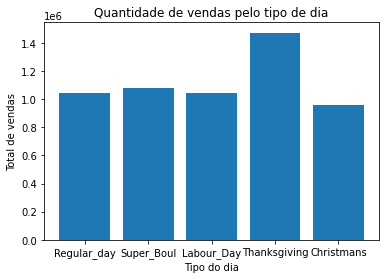

In [ ]:
#sns.barplot(x = df['Holiday_type'].value_counts(), y = 'Weekly_Sales', data = df)
day_type = ['Regular_day','Super_Boul','Labour_Day','Thanksgiving','Christmans']
total_sales = [df[df['Holiday_type']=='Regular_day']['Weekly_Sales'].mean(),
               df[df['Holiday_type']=='Super_Boul']['Weekly_Sales'].mean(),
               df[df['Holiday_type']=='Labour_Day']['Weekly_Sales'].mean(),
               df[df['Holiday_type']=='Thanksgiving']['Weekly_Sales'].mean(),
               df[df['Holiday_type']=='Christmans']['Weekly_Sales'].mean()]

plt.bar(day_type, total_sales)
plt.title('Quantidade de vendas pelo tipo de dia')
plt.xlabel('Tipo do dia')
plt.ylabel('Total de vendas')
plt.show()

analisando pela mediana


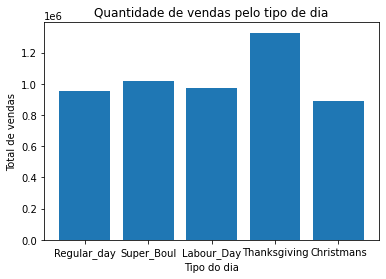

In [ ]:
day_type = ['Regular_day','Super_Boul','Labour_Day','Thanksgiving','Christmans']
total_sales = [df[df['Holiday_type']=='Regular_day']['Weekly_Sales'].median(),
               df[df['Holiday_type']=='Super_Boul']['Weekly_Sales'].median(),
               df[df['Holiday_type']=='Labour_Day']['Weekly_Sales'].median(),
               df[df['Holiday_type']=='Thanksgiving']['Weekly_Sales'].median(),
               df[df['Holiday_type']=='Christmans']['Weekly_Sales'].median()]

plt.bar(day_type, total_sales)
plt.title('Quantidade de vendas pelo tipo de dia')
plt.xlabel('Tipo do dia')
plt.ylabel('Total de vendas')
plt.show()

Comparando as vendas dos feriados (usando soma)

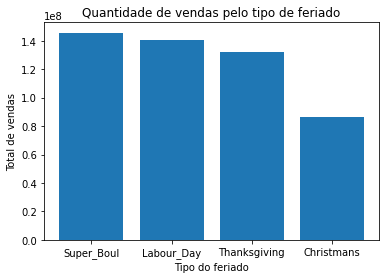

In [ ]:
holiday_type = ['Super_Boul','Labour_Day','Thanksgiving','Christmans']
total_holiday = [df[df['Holiday_type']=='Super_Boul']['Weekly_Sales'].sum(),
               df[df['Holiday_type']=='Labour_Day']['Weekly_Sales'].sum(),
               df[df['Holiday_type']=='Thanksgiving']['Weekly_Sales'].sum(),
               df[df['Holiday_type']=='Christmans']['Weekly_Sales'].sum()]

plt.bar(holiday_type, total_holiday)
plt.title('Quantidade de vendas pelo tipo de feriado')
plt.xlabel('Tipo do feriado')
plt.ylabel('Total de vendas')
plt.show()

OBS: no periodo ocorreram 3 super boul, 3 labour day, 2 thanksgiving e 2 christmans

Gráfico de linhas que mostre as vendas da loja ao longo do tempo

Procurando padrões em ***CPI***

In [ ]:
df['CPI'].min()

126.064

In [ ]:
df['CPI'].max()

227.2328068

In [ ]:
df['CPI'].mean()

171.5783938487799

In [ ]:
df['CPI'].median()

182.6165205

In [ ]:
df['CPI'].mode()

0      126.064000
1      126.076645
2      126.085452
3      126.089290
4      126.101935
          ...    
138    131.126667
139    131.136000
140    131.145333
141    131.149968
142    131.193097
Length: 143, dtype: float64

In [ ]:
df['CPI'].value_counts()

130.550207    11
129.043200    11
127.580032    11
127.440484    11
127.300935    11
              ..
214.751084     1
214.815521     1
214.961638     1
215.107755     1
214.741539     1
Name: CPI, Length: 2145, dtype: int64

In [ ]:
df['Date'].value_counts()

2010-05-02    45
2011-12-23    45
2011-11-11    45
2011-11-18    45
2011-11-25    45
              ..
2011-07-01    45
2011-01-14    45
2011-01-21    45
2011-01-28    45
2012-10-26    45
Name: Date, Length: 143, dtype: int64

In [ ]:
df[df['Holiday_Flag']==0].mean().round(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Store                23.000
Weekly_Sales    1041256.380
Holiday_Flag          0.000
Temperature          61.448
Fuel_Price            3.368
CPI                 171.602
Unemployment          7.994
dtype: float64

In [ ]:
df[df['Holiday_Flag']==1].mean().round(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Store                23.000
Weekly_Sales    1122887.892
Holiday_Flag          1.000
Temperature          50.232
Fuel_Price            3.227
CPI                 171.268
Unemployment          8.074
dtype: float64

In [ ]:
df[df['Holiday_type']=='Super_Boul']['Weekly_Sales'].sum()+df[df['Holiday_type']=='Labour_day']['Weekly_Sales'].sum()+df[df['Holiday_type']=='Thanksgiving']['Weekly_Sales'].sum()+df[df['Holiday_type']=='Christmans']['Weekly_Sales'].sum()


364571866.88

In [ ]:
df[df['Holiday_type']=='Regular_day']['Weekly_Sales'].sum()

6231919435.55

comparando a soma das vendas nos dias normais com os dias de feriado

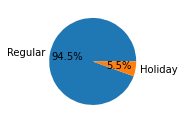

In [ ]:
fig = plt.figure(figsize =(2,2))
plt.pie([df[df['Holiday_type']=='Regular_day']['Weekly_Sales'].mean(),
         df[df['Holiday_type']=='Super_Boul']['Weekly_Sales'].mean()+df[df['Holiday_type']=='Labour_day']['Weekly_Sales'].mean()+df[df['Holiday_type']=='Thanksgiving']['Weekly_Sales'].mean()+df[df['Holiday_type']=='Christmans']['Weekly_Sales'].mean()],
         labels = ['Regular','Holiday'],autopct='%1.1f%%')
 

plt.show()

---

Gráfico da quantidade de semanas comuns  e feriados 

comparando a quantidade de dias normais com a quantidade de dias feriados

"plt.pie(np.array([df['Holiday_Flag'].]))\nplt.show()"

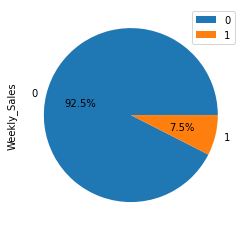

In [ ]:
df.groupby(['Holiday_Flag']).sum().plot(kind='pie', y='Weekly_Sales',autopct='%1.1f%%')
'''plt.pie(np.array([df['Holiday_Flag'].]))
plt.show()''' 

Grafico das vendas por feriados

In [ ]:
df.groupby('Store')['Weekly_Sales'].sum()

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

Media das colunas

In [ ]:
df.groupby('Store').agg({'Weekly_Sales':'sum','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'})

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
1,2.224028e+08,68.306783,3.219699,215.996892,7.610420
2,2.753824e+08,68.216364,3.219699,215.646311,7.623846
3,5.758674e+07,71.434196,3.219699,219.391531,7.176986
4,2.995440e+08,62.253357,3.216972,128.679669,5.964692
5,4.547569e+07,69.410140,3.219699,216.565581,6.295406
6,2.237561e+08,69.700000,3.219699,217.553197,6.606902
7,8.159828e+07,39.720280,3.241559,193.664243,8.585734
8,1.299512e+08,62.513986,3.219699,219.439026,6.091846
9,7.778922e+07,67.775175,3.219699,219.626689,6.099881


Verificando qual loja teve mais vendas, fazer somatorio das vendas de cada loja(e as medias das colunas relevantes)

In [ ]:
df_lojas = df.groupby('Store').agg({'Weekly_Sales':'sum','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}).copy()
df_lojas

SyntaxError: ignored

Verificando as lojas que possuem mais vendas

In [ ]:
df_lojas.sort_values(by= ['Weekly_Sales'], ascending = False)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
20,3.013978e+08,55.451399,3.417608,209.038131,7.371413
4,2.995440e+08,62.253357,3.216972,128.679669,5.964692
14,2.889999e+08,57.790979,3.417608,186.285678,8.648748
13,2.865177e+08,53.697133,3.286147,128.679669,7.001825
2,2.753824e+08,68.216364,3.219699,215.646311,7.623846
10,2.716177e+08,72.241189,3.575923,128.679669,8.362965
27,2.538559e+08,57.311119,3.578294,139.011284,8.001748
6,2.237561e+08,69.700000,3.219699,217.553197,6.606902
1,2.224028e+08,68.306783,3.219699,215.996892,7.610420


In [ ]:
# Gráfico (lojas  X vendas ) exibindo vendas em dias comuns
plt.figure(figsize=(15,5))
sns.barplot(x='Store', y='Weekly_Sales', data = df_lojas['Holiday_type']!='Regular_Day')

KeyError: ignored

<Figure size 1080x360 with 0 Axes>

Verificando as lojas que vendem menos

In [ ]:
df_lojas.sort_values(by= ['Weekly_Sales'], ascending =True)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
33,3.716022e+07,76.728182,3.575923,128.679669,8.533154
44,4.329309e+07,53.697133,3.286147,128.679669,6.735622
5,4.547569e+07,69.410140,3.219699,216.565581,6.295406
36,5.341221e+07,71.160350,3.204203,214.729069,7.869049
38,5.515963e+07,70.262797,3.606420,128.679669,13.116483
3,5.758674e+07,71.434196,3.219699,219.391531,7.176986
30,6.271689e+07,68.847622,3.219699,215.646311,7.623846
37,7.420274e+07,71.160350,3.219699,214.729069,7.869049
16,7.425243e+07,45.030070,3.241559,193.664243,6.477993


#Conclusão: Com os dados que temos não é possivel decidir qual é a melhor loja para receber uma expansão, sugiro decidir atravez de uma analise do crescimento de uma loja ao longo do periodo, verificando as lojas que atingiram um "teto"(valor em que a loja nao conseguiu ultrapassar e ocorreu varias vezes ao longo do periodo) podendo indicar que esta sofrendo uma limitação(pode ser falta de espaço mas também pode ser outro motivo, má administração, atrasos em entregas, deixar claro) e decidir através disso. Não foi encontrado padrão no CPI para justificar um comportamento, Taxa de desemprego também se mostrou irrelevante, precisariamos de mais dados como: Eficiencia da equipe da loja tamanho da loja. Também foi verificado que as semanas que foram considerados feriados não exerssem muita diferença nas vendas, algumas inclusive tiveram media de vendas abaixo dos dias normais, o feriado que mais teve uma  mudança foi o feriado de ***Thanksgiven*** que houve um aumento consideravel e o de ***Christmans***  que teve uma baixa nas vendas(verificamos que nos feriados que acabaram nos dias ***23*** e ***24*** de ***dezembro*** foram os que tiveram as maiores vendas porem foi definido como Christmans foi definido nas semanas que acabaram nos dias ***28***, ***30*** e ***31*** de ***dezembro***

---

verificar o crescimento da loja, se foi constante ate o final do periodo

Temos uma linha de tempo. Fazer uma linha de crescimento para avaliar se a loja esta venddendo mais conforme o passar do tempo

Fazer relatório em power point, com graficos insights e decisões, com apresentação do projeto???

O Índice de Preços ao Consumidor (IPC) mede a variação de preços de um conjunto fixo de bens e serviços componentes de despesas habituais de famílias com nível de renda situado entre 1 e 33 salários mínimos mensais.

Verifica-se que os feriados nao exercem mta influencia para as vendas, obs verificar proximidades com o feriado(ex: as maiores vendas foram nos dias 23 e 24, considerou natal dias 28,30 e 31, não podemos só olhar o dia dos feriados precisaremos ver a proximidade)

"essas remarcações precedem feriados importantes, os quatro maiores de todos, que são (os 4 marcados) as semanas que incluem esses feriados tem um peso maior"

Pq estão pedindo tanto destaque com feriados se precisamos considerar as lojas que mais vendem o ano inteiro já que o aumento da loja é uma mudança permanente

Usar os feriados para avaliar o crescimento nas vendas e usar esse crescimento como forma de avaliar a loja que precisa mais da expansão

o aumento das vendas em si não mostra o porque a loja precisa de expansão, assim como sua venda

---

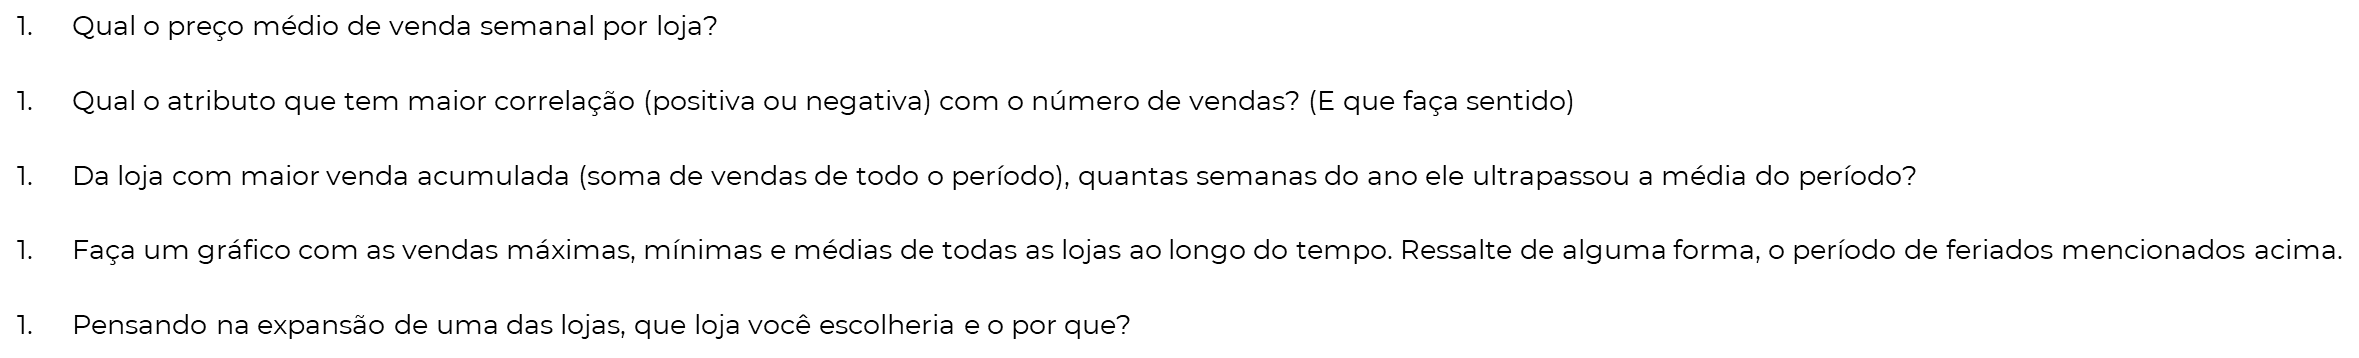